# Song Hit Prediction


## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# do ploting inline instead of in a serpate window
%matplotlib inline

## Load And review Data


In [28]:
df = pd.read_csv("./featuresdf.csv")

In [29]:
df.shape

(100, 16)

In [30]:
df.head(5)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [31]:
df.tail(5)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,0.675,0.690,2.0,-4.761,1.0,0.1320,0.210,0.000000,0.287,0.2720,137.817,239293.0,4.0
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,0.542,0.859,11.0,-5.651,1.0,0.1970,0.160,0.004660,0.137,0.4030,159.797,208053.0,4.0
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,0.731,0.469,5.0,-7.226,1.0,0.0326,0.463,0.000001,0.103,0.6310,98.963,165387.0,4.0
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,0.658,0.588,6.0,-4.902,0.0,0.0367,0.105,0.000001,0.125,0.4340,110.075,214802.0,4.0
99,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,11.0,-6.593,0.0,0.0390,0.101,0.000001,0.106,0.0967,180.043,239000.0,4.0


In [32]:
df.isnull().values.any()

False

In [33]:
df.dropna(how='any',axis=0)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.9310,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.8130,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.8460,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.4460,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.055200,0.000000,0.1670,0.8110,80.924,288600.0,4.0
5,7KXjTSCq5nL1LoYtL7XAw,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.4000,150.020,177000.0,4.0
6,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,0.0,-6.596,1.0,0.0706,0.119000,0.000000,0.0864,0.5150,99.968,220781.0,4.0
7,3B54sVLJ402zGa6Xm4YGN,Unforgettable,French Montana,0.726,0.769,6.0,-5.043,1.0,0.1230,0.029300,0.010100,0.1040,0.7330,97.985,233902.0,4.0
8,0KKkJNfGyhkQ5aFogxQAP,That's What I Like,Bruno Mars,0.853,0.560,1.0,-4.961,1.0,0.0406,0.013000,0.000000,0.0944,0.8600,134.066,206693.0,4.0
9,3NdDpSvN911VPGivFlV5d,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,0.735,0.451,0.0,-8.374,1.0,0.0585,0.063100,0.000013,0.3250,0.0862,117.973,245200.0,4.0


In [64]:
df.isnull().values.any()

False

In [65]:
def plot_corr(df, size=19):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

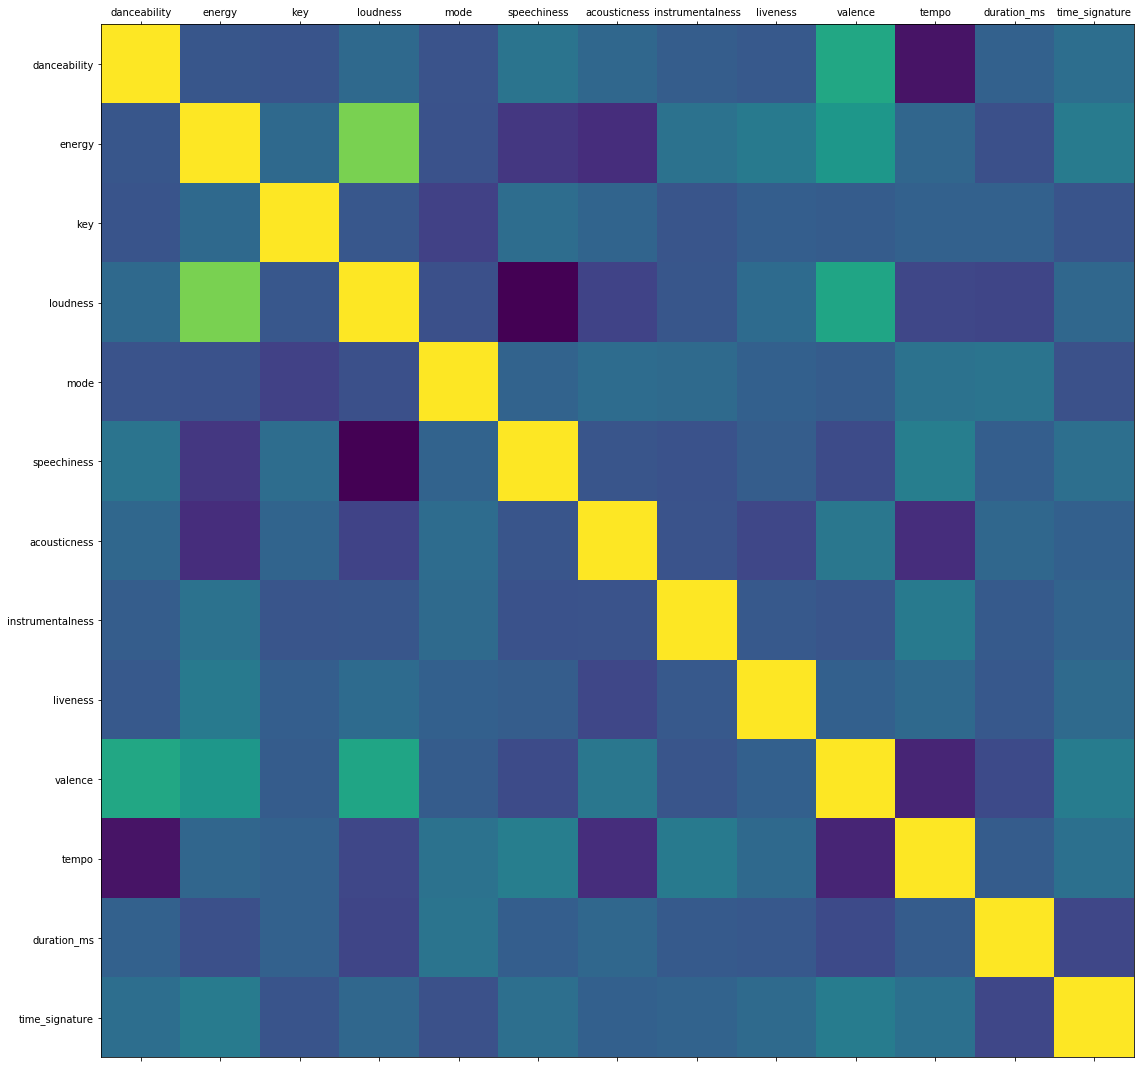

In [66]:
plot_corr(df, 19)

In [36]:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.057239,-0.068057,0.052759,-0.071724,0.111775,0.039398,-0.019826,-0.042014,0.423435,-0.364492,0.006038,0.078996
energy,-0.057239,1.000000,0.049560,0.709141,-0.078994,-0.206672,-0.253051,0.101128,0.147744,0.321781,0.032676,-0.090013,0.154330
key,-0.068057,0.049560,1.000000,-0.053684,-0.164038,0.070721,0.021402,-0.062148,-0.012909,-0.023195,0.005246,0.006513,-0.065778
loudness,0.052759,0.709141,-0.053684,1.000000,-0.090640,-0.443359,-0.153320,-0.057377,0.060033,0.407731,-0.136692,-0.143251,0.036958
mode,-0.071724,-0.078994,-0.164038,-0.090640,1.000000,0.016506,0.066332,0.053900,-0.000182,-0.023205,0.100207,0.114663,-0.085525
speechiness,0.111775,-0.206672,0.070721,-0.443359,0.016506,1.000000,-0.061942,-0.081229,-0.019815,-0.111576,0.172082,-0.011580,0.085775
acousticness,0.039398,-0.253051,0.021402,-0.153320,0.066332,-0.061942,1.000000,-0.074258,-0.135417,0.127241,-0.253404,0.038362,0.002003
instrumentalness,-0.019826,0.101128,-0.062148,-0.057377,0.053900,-0.081229,-0.074258,1.000000,-0.040742,-0.061523,0.148184,-0.033085,0.018606
liveness,-0.042014,0.147744,-0.012909,0.060033,-0.000182,-0.019815,-0.135417,-0.040742,1.000000,-0.000645,0.049356,-0.046741,0.057027
valence,0.423435,0.321781,-0.023195,0.407731,-0.023205,-0.111576,0.127241,-0.061523,-0.000645,1.000000,-0.291877,-0.120407,0.162900


In [39]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [40]:
 ### change mode of 0.0  to 0 and 1.0 to 1
mode_map = {0.0: 0, 1.0: 1}
df['mode'] = df['mode'].map(mode_map)
 

In [41]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [44]:
# check for times of mode as 1 or false
num_1 = len(df.loc[df['mode'] == 1])
num_0 = len(df.loc[df['mode']] == 0)
percent_num_1 = ( num_1 / (num_1 + num_0)) * 100
percent_num_0 = ( num_0 / (num_1 + num_0)) * 100
print(" Number of 1 caes: ", num_1, percent_num_1 )
print(" Number of 0 cases: ", num_0, percent_num_0 )

 Number of 1 caes:  58 36.708860759493675
 Number of 0 cases:  100 63.29113924050633


## splitting  the data
70% for training and 30% for testing

In [57]:
from sklearn.cross_validation import train_test_split
features_col_names = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
predicted_class_names = ['mode']
X = df[features_col_names].values 
y = df[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size , random_state=42)


In [53]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index))* 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index))* 100))

70.00% in training set
30.00% in test set


## Training initial Algorithm  - Naive Bayes


In [58]:
from  sklearn.naive_bayes  import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

## Performance on Testing Data

In [68]:
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.6714
